In [2]:
import numpy as np
from dt_code import SpectraReduction
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

In [3]:
# Reduced data with a wavelength solution and errors
ref_file = '/Users/arcticfox/Documents/atmospheres/v1298tau/data/N20200122G0066m.fits'

# Requires a directory where all the raw FITS files are
# Set reload = False for the first go-around. After, setting reload = True saves time
dt_obj = SpectraReduction(fn_dir='/Users/arcticfox/Downloads/gemini_data/',
                           ref_file=ref_file, reload=True)

### Example -- master median flat frame

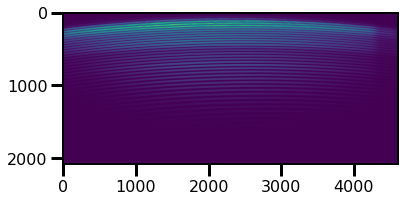

In [4]:
plt.imshow(dt_obj.med_flat.T)

### Example -- Discrete box model around a given order

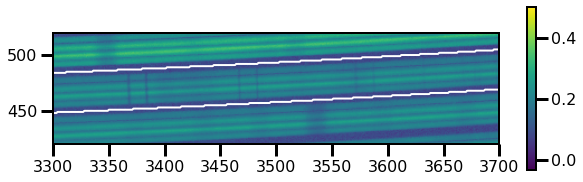

In [5]:
plt.figure(figsize=(10,3))
plt.imshow(dt_obj.science_frames[10].T, vmax=0.5)
plt.xlim(3300,3700)
plt.ylim(420,520)
plt.plot(dt_obj.discrete_model[10], 'w', lw=2)
plt.plot(dt_obj.discrete_model[11], 'w', lw=2)
plt.colorbar()

### Barycentric correction for wavelengths

In [6]:
dt_obj.barycentric_correction('V1298 Tau')

### Extracts the orders

In [7]:
dt_obj.extract_data()

100%|██████████| 53/53 [01:13<00:00,  1.41s/it]


### Example -- Raw and corrected spectra for H-alpha order

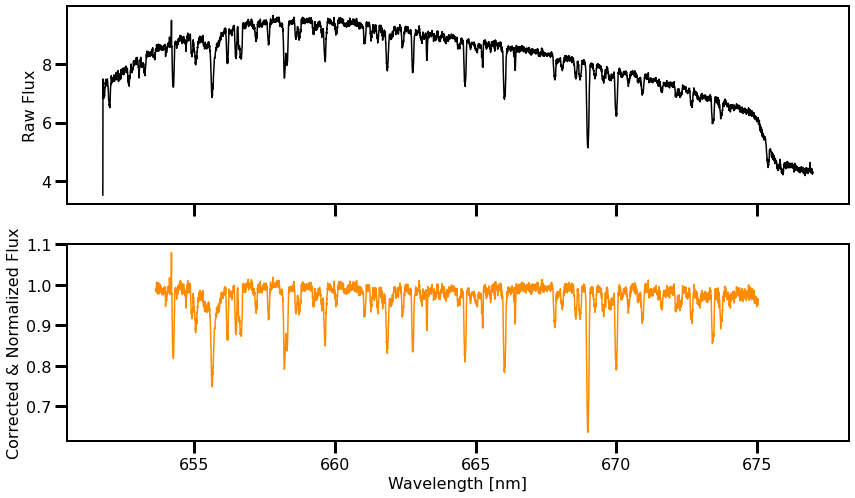

In [12]:
i, ind = 20, 11
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), nrows=2,
                               sharex=True)

ax1.plot(dt_obj.wavelengths[i][ind], 
         dt_obj.spectra[i][ind], 'k')
ax2.plot(dt_obj.corrected_wavelengths[i][ind], 
         dt_obj.corrected_spectra[i][ind], 'darkorange')

ax1.set_ylabel('Raw Flux')
ax2.set_ylabel('Corrected & Normalized Flux')
plt.xlabel('Wavelength [nm]');

### Paper Figure 1

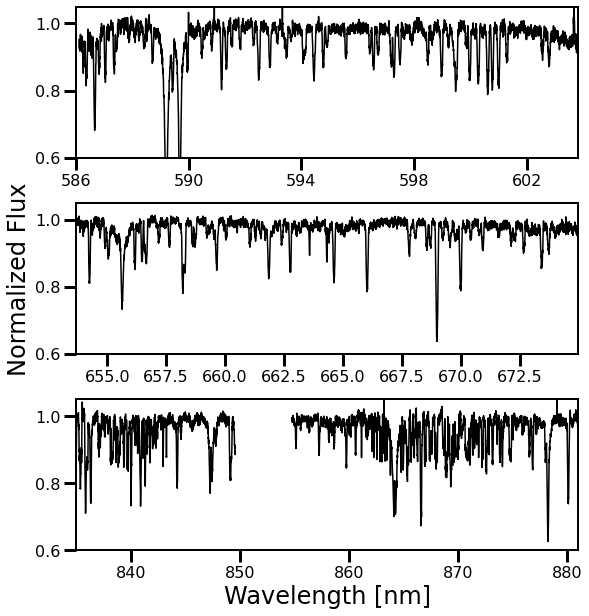

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(9,10),
                                    sharey=True)

halpha_ind = 11
hind = 11
ax2.plot(dt_obj.corrected_wavelengths[hind][halpha_ind], 
         dt_obj.corrected_spectra[hind][halpha_ind], 'k')
ax2.set_xlim(dt_obj.corrected_wavelengths[hind][halpha_ind][10], 
             dt_obj.corrected_wavelengths[hind][halpha_ind][-10])

ca_ind = 4
ax3.plot(dt_obj.corrected_wavelengths[hind][ca_ind][10:],
         dt_obj.corrected_spectra[hind][ca_ind][10:], 'k')
ax3.plot(dt_obj.corrected_wavelengths[hind][ca_ind-1][10:],
         dt_obj.corrected_spectra[hind][ca_ind-1][10:], 'k')

ax3.set_xlim(835,881)


nad_ind = 15

ax1.plot(dt_obj.corrected_wavelengths[hind][nad_ind], 
         dt_obj.corrected_spectra[hind][nad_ind], 'k')
ax1.set_xlim(dt_obj.corrected_wavelengths[hind][nad_ind][10], 
             dt_obj.corrected_wavelengths[hind][nad_ind][-10])

ax1.set_xticks(np.arange(586, 603, 4))

plt.ylim(0.6,1.05)
plt.subplots_adjust(wspace=0.1)

ax2.set_ylabel('Normalized Flux', fontsize=24)
ax3.set_xlabel('Wavelength [nm]', fontsize=24)

plt.subplots_adjust(hspace=0.3)